# Ordinary Differential Equations

Differential equations are systems whose variables change with time. Mathematically, differentials are functions that contain derivatives of itself. When these systems are integrated, they provide analytical  functions that are dependent with time. Integration of differentials can be performed by calculus, or numerically. 

INSERT image here)

Ordinary differential equations (ODES) are equations that have a single dependent variables. Partial differential equations are equations that are dependent on 2 or more variables. Furthermore, the order of a differential equation is characterized by the highest derivative of an independent variable. 

Biological cell growth is a first order differential that describes the exponential increase of biomass concentration  (X) accumulation over time (assuming $ \mu _g  $  is constant ). 


$$ \frac{dX}{dt} = \mu_g X  $$

The Navier-Stokes equations in contrast, are 2nd order partial differentials describing particle position of a fluid as a function of the derivatives of speed, sheer, time and, pressure. 

$$ \rho \big( \frac{du}{dt} +u \frac{du}{dx} + v \frac{dv}{dy} + w \frac{dw}{dz} \big) = - \frac{dP}{dx} + \mu \big( \frac{d^2u}{dx^2} + \frac{d^2v}{dy^2} +  \frac{d^2w}{dz^2}    \big)  $$ 

The scope of this tutorial focuses on  first order, ordinary differential equations. 



When ODE's are solved, some have an analytical solution. For example, solving the Biomass growth equation gives this analytical solution.

$$ X = X_0 e^{\mu _g (t-t_0)} $$

Where $ X_0 $  and $ t_0 $  are initial conditions of the cell concentration and lag time.  

If you have worked with numerical methods in Excel, you may have come across solving differentials by using this form:


$$  \frac{dX}{dt} = \mu_g X$$

$$ \frac{X_{i+1}-X_i}{t_{i+1} - t{i}} = \mu_g X_i  $$

$$ X_{i+1}  =   X_{i}+ \mu _g X_i  \Delta t $$ 


This form of discretizing is the basis of numerical methods for ODE's and are called *single step* or *Runge Kutta* methods.

$$ Value_{new} = Value_{old} + slope*stepsize  $$  

$$ y_{i+1}  = y_i + \phi h$$

Well studied methods have minimized the error in the phi term to provide highly accurate ODE integrators. 

## Comparing Analytical solutions  with Numerical Solvers 
### Stepsizes are important! 

When using numerical solvers, it is important to consider the step size that the solver is operating at. Discrete methods are stepsize dependent. The code below illustrates what happens to a simple ode solver at low and high step sizes compared to the analytical equation.




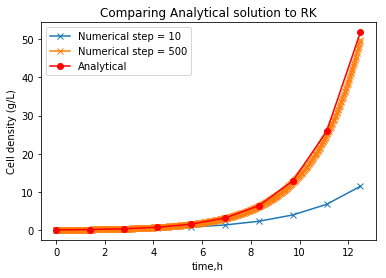

In [15]:


import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

y0 = 0.1 
ug = 0.5 
tot = 12.5 
stepsize = 10


## using simple RK method
t = np.linspace(0,tot,stepsize) # creating a time vector
t2 = np.linspace(0,tot,stepsize*50) # creating a time vector
dt = t[1]-t[0] # establishing dt
dt2 = t2[1]-t2[0] # establishing dt
y = np.zeros(len(t)) # creating a Cell density vector 
y2 = np.zeros(len(t2)) # creating a Cell density vector 
y[0] = y0
y2[0] = y0


for i in range (1, len(t)):
    y[i] = y[i-1] + ug*y[i-1]*dt
for i in range (1, len(t2)):
    y2[i] = y2[i-1] + ug*y2[i-1]*dt2

## using analytical solution 
    X = np.exp(ug*(t))*y0
    
# plotting both in comparaison
plt.xlabel('time,h')
plt.ylabel('Cell density (g/L)')
plt.title ('Comparing Analytical solution to RK')
plt.plot(t,y,'-x',label='Numerical step = 10')
plt.plot(t2,y2,'-x',label='Numerical step = 500')
plt.plot(t,X,'-or',label = 'Analytical')
plt.legend()

## Using Scipy's ODE solver

More complicated ODE solvers can be derived and have been. One of the common solvers comes from SciPy's Integrate library. The function is called  ```odeint ```. More can be read about the numerical method here: [Adams-Bashforths method](https://www.math.utah.edu/~vshankar/5620/LinearMultistepI.pdf)

```odeint``` takes the following arguements ```odeint(function,intial_value,time_vector) ```.  It is important to note that the function to input into python is an actual python function that returns the derivative of the system. 

Using the cell growth model for the last time... A function is created to return the derivative of the cell growth: $ \frac{dX}{dt} = \mu _g X $

In [16]:
ug = 0.5 
def dxdt(X,t):
    return ug*X

Next, a time vector is created and the initial concentration is set.

In [23]:
tfinal = 12 
time = np.linspace(0,tfinal,200) # from 0 hours to 20 hours in 200 intervals 
y0 = 2 # initial cell concentration  is 2 g/L

These values are subsequently input into the ```odeint``` function, which is stored into a vector and plotted out. 

After 12 hours, the final cell density is [806.85766419] g/L


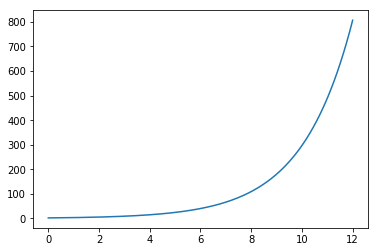

In [24]:
X = odeint(dxdt,y0,time)
plt.plot(time,X)
print ("After {} hours, the final cell density is {} g/L".format(tfinal,X[-1]) )

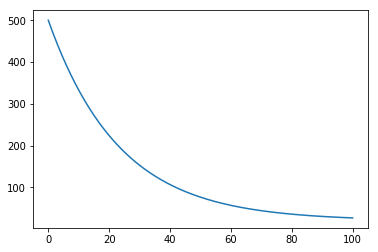

In [31]:
C0 = 500 # g/L
t = np.linspace(0,100,200) # minutes 
dt= t[1]-t[0]

def dcdt(C,t):
    return (600/700-30/700*C)

sol  = integrate.odeint(dcdt,C0,t)


# print(t)
plt.plot(t,sol)

In [21]:
print(type(X))

<class 'numpy.ndarray'>


In [9]:
len(t2)

500

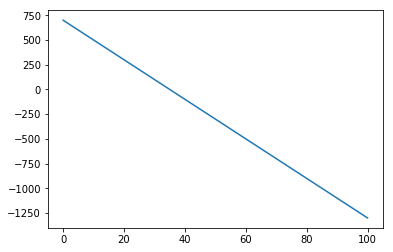

In [30]:
def dvdt(V,t):
    return (-20)
vol  = integrate.odeint(dvdt,700,t)
plt.plot(t,vol)